# Elevator Simulation #1



### Strategies
Our first strategy creates a list of the elevators "target" destinations drawing from the randomly generated destinations of the passengers. Once these have been identified the elevator only stops at the "target floors" while it goes up and then back down. This strategy allows for simplicity, the elevator only goes in a single direction, but also cuts down on individual passenger waiting time by only stopping at floors that either have waiting passenger or where passenger want to get off on. Our second strategy first goes to the 10th floor and then stops at each floor in its descent to the lobby. 

###Efficiency
These strategies measure efficiency by keeping count of the number of times a passenger has to wait on non_target floors because other passengers are unloading.We measure this through using a counter, which increases(+1) the waiting time count of each passenger. This allows us to gain an understanding of the amount of time passengers are waiting, our goal to cut down on the waiting time associated with an individual passenger.


In the end we run the simulation 10,000 times and average the results. From this we created two histograms that display our results, finding the first strategy to be more efficient. 

## Classes

In [0]:
import random
class Passenger():
    # Create the attributes of the passenger class
    def __init__(self, target_floor = 0, waiting_time = 0):
        self.target_floor = random.randint(1,10) #The floor that the passenger wants to go
        self.waiting_time = waiting_time #The time that a passenger has to wait for the elevator

class Building():
    # Creates the attributes of the building class 
    def __init__(self, num_floor = 10, non_empty_floors = []):
        self.num_floor = num_floor
        self.passengers_on_each_floor = [[] for i in range(self.num_floor)]
        # variable which creates an empty list of an empty list for each floor 
        #  where information regarding passengers is stored  

    # Creates the passenger objects and place them in random floors
    def new_passenger(self):
        
        new_passenger = Passenger()
        floor = random.randint(1,10)
        
        # Solves the issue of a passenger being assigned to a destination floor
        #  that is the same of where it is currently in, by manually adding a floor
        if floor == new_passenger.target_floor:
            if new_passenger.target_floor == 10:
                floor = floor - 1
            else:
                floor += 1
        
        # Appends the random floor to a list of passengers in each floor
        self.passengers_on_each_floor[floor -1].append(new_passenger)
    
    # Method to check in which floors there are passengers, 
    #  so we can check target floors in the simulation         
    def update_non_empty_floors(self,my_elevator):
        for i in range(0, len(self.passengers_on_each_floor)):
            floors = self.passengers_on_each_floor[i]
            if floors != []:
                if (i+1) not in my_elevator.target_floor:
                    my_elevator.target_floor.append (i+1)
        
        # Check the target floor of the passengers inside the elevator         
        for passenger in my_elevator.passengers_in_the_lift:
            if passenger.target_floor not in my_elevator.target_floor:
                my_elevator.target_floor.append(passenger.target_floor)

In [0]:
class Elevator():
    # Creates the attributes of the elevator class
    def __init__(self, current_floor = 0, direction = 1, maxpassenger = 10 ,next_floor = 0,target_floor = []):
        self.current_floor = current_floor
        self.next_floor = next_floor
        self.direction = direction
        self.maxpassenger = maxpassenger
        self.passengers_in_the_lift = []
        self.target_floor = target_floor
        self.waiting_times = []
        self.visited_floors = [0]
        
    # Checking for target floors
    def Target(self):
        
        # Sets top-most or bottom most floor from the target floor list
        #  to assign the direction the elevator should head.
        if self.current_floor > max(self.target_floor):
            self.direction = -1
        
        if self.current_floor < min(self.target_floor):
            self.direction = 1
        
        # Defines what is the next floor the elevator should head, based
        #  on what is the top-most or bottom-most target in the target_floor
        #  list.
        if self.direction == 1:
            potential_targets = []
            for i in self.target_floor:
                if i >= self.current_floor:
                    potential_targets.append(i)    
            self.next_floor = min(potential_targets)
            
        if self.direction == -1:
            potential_targets = []
            for i in self.target_floor:
                if i <= self.current_floor:
                    potential_targets.append(i)
            self.next_floor = max(potential_targets)
            
    # Moving the elevator to the target floors & adds waiting time to
    #  passengers.
    def Move(self,our_building):
        self.current_floor = self.next_floor
        for floor in our_building.passengers_on_each_floor:
            for Passenger in floor:
                Passenger.waiting_time += 1
                
        self.visited_floors.append(self.current_floor)
        
                
    # Unloading the passengers from the elevator to their target floors
    #  and appending their waiting times to measure efficiency
    def Unload(self):
        self.target_floor.remove(self.current_floor)
        for Passenger in self.passengers_in_the_lift:
            if Passenger.target_floor == self.current_floor:
                self.waiting_times.append(Passenger.waiting_time)
                self.passengers_in_the_lift.remove(Passenger)
                
            
    # Loading the passengers from target floors to elevator
    def Load(self,our_building):
        while len(our_building.passengers_on_each_floor[self.current_floor -1]) > 0 and len(self.passengers_in_the_lift) < self.maxpassenger:
            
            current_passenger = our_building.passengers_on_each_floor[self.current_floor -1][0]
            self.passengers_in_the_lift.append(current_passenger)
            our_building.passengers_on_each_floor[self.current_floor-1].remove(current_passenger)
            if current_passenger.target_floor not in self.target_floor:
                self.target_floor.append(current_passenger.target_floor)


In [0]:
# Class to execute the simulation
def Simulation():
    our_building = Building()
    my_elevator = Elevator()
    our_building.new_passenger()
    our_building.new_passenger()
    our_building.update_non_empty_floors(my_elevator)

    # The elevator should work as long as there are objects in the lift 
    # or in there are target floors (i.e., these lists are not empty)
    i = 0
    while my_elevator.passengers_in_the_lift != [] or my_elevator.target_floor != []: 
        my_elevator.Target()
        my_elevator.Move(our_building)
        my_elevator.Unload()
        my_elevator.Load(our_building)
    
        # Adds passengers to the elevator for the first 10 loops
        if i < 10:
            our_building.new_passenger()
            i = i + 1
    
        our_building.update_non_empty_floors(my_elevator)
    
    return my_elevator.waiting_times,my_elevator.visited_floors

## Simulation

In [0]:
waits, floors = Simulation()

## Visualization

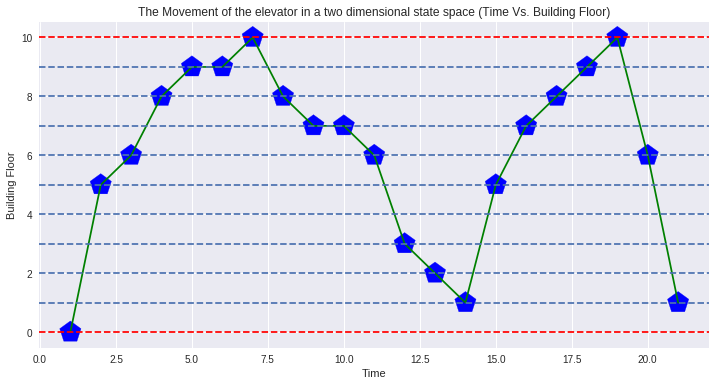

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(range(1,len(floors)+1),floors,marker='p',s=[500 for i in range(6)],color='blue')
plt.plot(range(1,len(floors)+1),floors,color='green')
plt.xlabel('Time')
plt.ylabel('Building Floor')
plt.title('The Movement of the elevator in a two dimensional state space (Time Vs. Building Floor)')
plt.axhline(1,linestyle='--')
plt.axhline(2,linestyle='--')
plt.axhline(3,linestyle='--')
plt.axhline(4,linestyle='--')
plt.axhline(5,linestyle='--')
plt.axhline(6,linestyle='--')
plt.axhline(7,linestyle='--')
plt.axhline(8,linestyle='--')
plt.axhline(9,linestyle='--')
plt.axhline(10,color='red',linestyle='--')
plt.axhline(0,color='red',linestyle='--')
plt.show()

In [0]:
import numpy as np
waiting_times_1 = []
number_of_stops = []

for i in range(0,10000):
    waits, floors = Simulation()
    waiting_times_1.append(np.mean(waits))
    number_of_stops.append(len(floors))

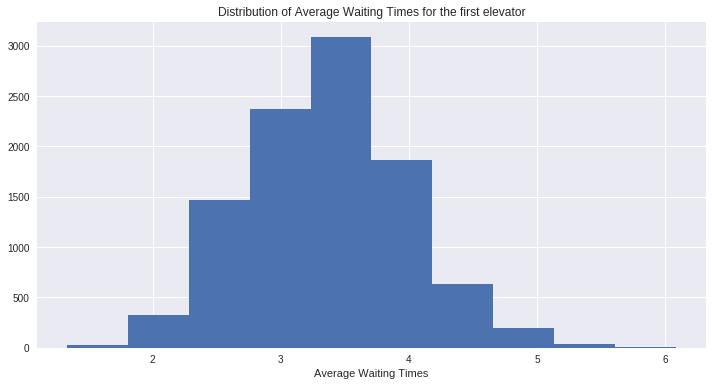

In [0]:
plt.figure(figsize=(12,6))
plt.hist(waiting_times_1)
plt.title('Distribution of Average Waiting Times for the first elevator')
plt.xlabel('Average Waiting Times')
plt.show()

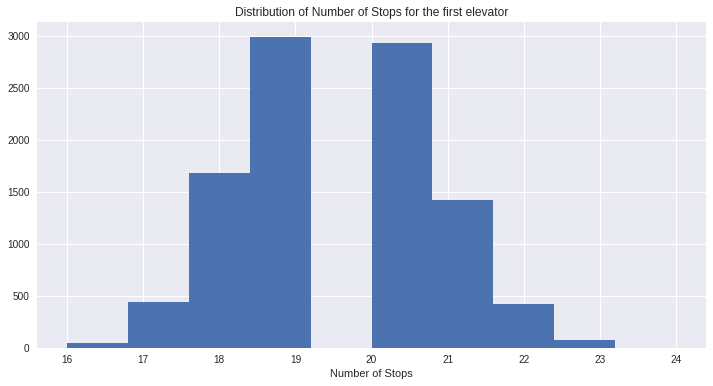

In [0]:
plt.figure(figsize=(12,6))
plt.hist(number_of_stops)
plt.title('Distribution of Number of Stops for the first elevator')
plt.xlabel('Number of Stops')
plt.show()

# Elevator Simulation #2

## Classes

In [1]:
import random
class Passenger2():
    # Create the attributes of the passenger class
    def __init__(self, target_floor = 0, waiting_time = 0):
        self.target_floor = random.randint(1,10) #The floor that the passenger wants to go
        self.waiting_time = waiting_time #The time that a passenger has to wait for the elevator

class Building2():
    # Creates the attributes of the building class 
    def __init__(self, num_floor = 10, non_empty_floors = []):
        self.num_floor = num_floor
        self.passengers_on_each_floor = [[] for i in range(self.num_floor)]
        self.non_empty_floors = non_empty_floors
        # variable which creates an empty list of an empty list for each floor 
        # where information regarding passengers is stored  

    # Creates the passenger objects and place them in random floors
    def new_passenger(self):
        
        new_passenger = Passenger2()
        floor = random.randint(1,10)
        
        # Solves the issue of a passenger being assigned to a destination floor
        #  that is the same of where it is currently in, by manually adding a floor
        if floor == new_passenger.target_floor:
            if new_passenger.target_floor == 10:
                floor = floor - 1
            else:
                floor += 1
        
        self.passengers_on_each_floor[floor -1].append(new_passenger)
    
    # Method to check in which floors there are passengers, 
    #  so we can check target floors in the simulation   
    def update_non_empty_floors(self,my_elevator):
        for i in range(0, len(self.passengers_on_each_floor)):
            floors = self.passengers_on_each_floor[i]
            if floors != []:
                if (i+1) not in my_elevator.target_floor:
                    my_elevator.target_floor.append (i+1)
        
        # Check the target floor of the passengers inside the elevator         
        for passenger in my_elevator.passengers_in_the_lift:
            if passenger.target_floor not in my_elevator.target_floor:
                my_elevator.target_floor.append(passenger.target_floor)

In [2]:
class Elevator2():
    # Creates the attributes of the elevator class
    def __init__(self, current_floor = 0, direction = 1, maxpassenger = 10 ,next_floor = 0):
        self.current_floor = current_floor
        self.next_floor = next_floor
        self.direction = direction
        self.maxpassenger = maxpassenger
        self.passengers_in_the_lift = []
        self.waiting_times = []
        self.visited_floors = [0]
        
    # Checking for target floors
    def Target(self):
        
        # Function to change the direction of the elevator
        #  if it reaches the 10th and it is going up, it changes the
        if self.direction == 1:
            self.next_floor = 10
            self.direction = -1
            
        elif self.direction == -1:
            if self.current_floor == 1:
                direction = 1
                self.next_floor = 10
            
            else:
                self.next_floor = self.current_floor - 1
            
    # Moving the elevator to the target floors
    def Move(self,our_building):
        self.current_floor = self.next_floor
        for floor in our_building.passengers_on_each_floor:
            for Passenger in floor:
                Passenger.waiting_time += 1
                
        self.visited_floors.append(self.current_floor)
        
                
    # Unloading the passengers from the elevator to their target floors
    def Unload(self):
        for Passenger in self.passengers_in_the_lift:
            if Passenger.target_floor == self.current_floor:
                self.waiting_times.append(Passenger.waiting_time)
                self.passengers_in_the_lift.remove(Passenger)
                
            
    # Loading the elevator from target floors to elevator
    def Load(self,our_building):
        while len(our_building.passengers_on_each_floor[self.current_floor -1]) > 0 and len(self.passengers_in_the_lift) < self.maxpassenger:
            current_passenger = our_building.passengers_on_each_floor[self.current_floor -1][0]
            self.passengers_in_the_lift.append(current_passenger)
            our_building.passengers_on_each_floor[self.current_floor-1].remove(current_passenger)

In [3]:
def Simulation2():
    our_building = Building2()
    our_building.new_passenger()
    our_building.new_passenger()
    our_building.update_non_empty_floors()
    my_elevator = Elevator2()

    i = 0
    while my_elevator.passengers_in_the_lift != [] or our_building.non_empty_floors != []: 
    
        my_elevator.Target()
        my_elevator.Move(our_building)
        my_elevator.Unload()
        my_elevator.Load(our_building)
    
        if i < 10:
            our_building.new_passenger()
            i = i + 1
    
        our_building.update_non_empty_floors()
    
    return my_elevator.waiting_times,my_elevator.visited_floors

## Simulation

In [4]:
waits, floors = Simulation2()

TypeError: update_non_empty_floors() missing 1 required positional argument: 'my_elevator'

## Visualization

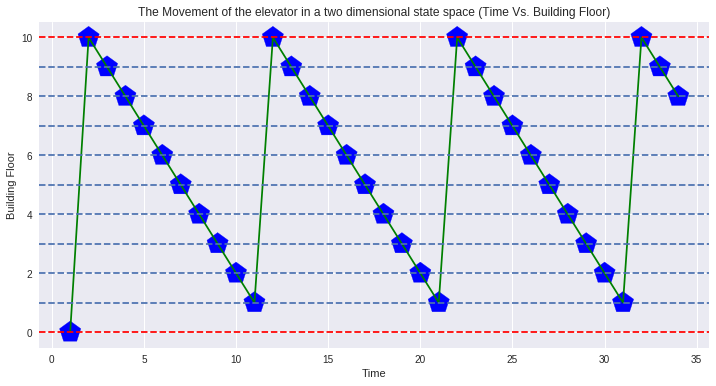

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(range(1,len(floors)+1),floors,marker='p',s=[500 for i in range(6)],color='blue')
plt.plot(range(1,len(floors)+1),floors,color='green')
plt.xlabel('Time')
plt.ylabel('Building Floor')
plt.title('The Movement of the elevator in a two dimensional state space (Time Vs. Building Floor)')
plt.axhline(1,linestyle='--')
plt.axhline(2,linestyle='--')
plt.axhline(3,linestyle='--')
plt.axhline(4,linestyle='--')
plt.axhline(5,linestyle='--')
plt.axhline(6,linestyle='--')
plt.axhline(7,linestyle='--')
plt.axhline(8,linestyle='--')
plt.axhline(9,linestyle='--')
plt.axhline(10,color='red',linestyle='--')
plt.axhline(0,color='red',linestyle='--')
plt.show()

In [0]:
import numpy as np
waiting_times_2 = []
number_of_stops_2 = []

for i in range(0,10000):
    waits, floors = Simulation2()
    waiting_times_2.append(np.mean(waits))
    number_of_stops_2.append(len(floors))

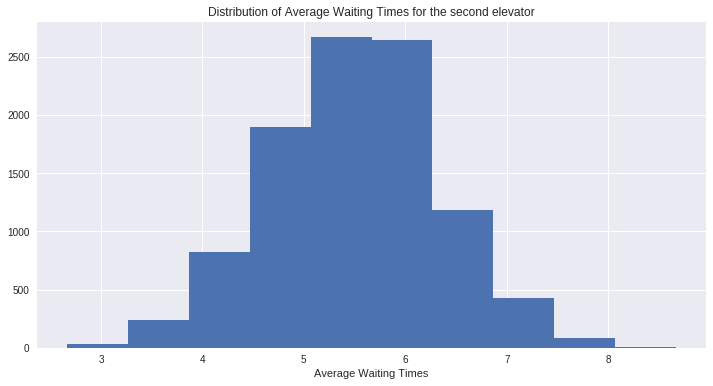

In [0]:
plt.figure(figsize=(12,6))
plt.hist(waiting_times_2)
plt.title('Distribution of Average Waiting Times for the second elevator')
plt.xlabel('Average Waiting Times')
plt.show()

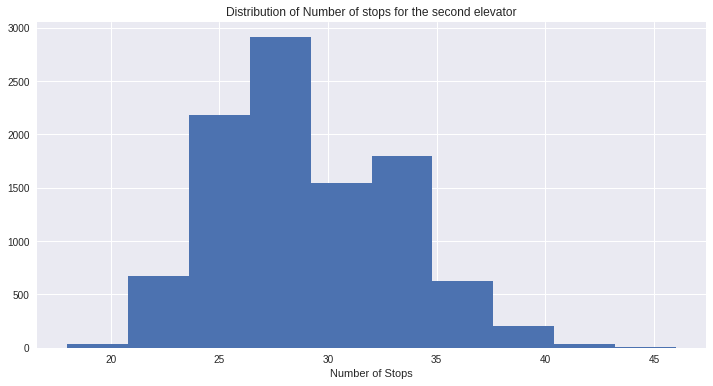

In [0]:
plt.figure(figsize=(12,6))
plt.hist(number_of_stops_2)
plt.title('Distribution of Number of stops for the second elevator')
plt.xlabel('Number of Stops')
plt.show()

# Comparing the efficiency of simulations

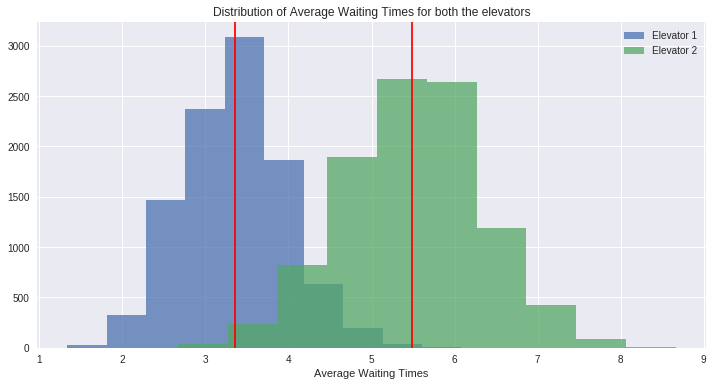

In [0]:
plt.figure(figsize=(12,6))
plt.hist(waiting_times_1,label='Elevator 1',alpha = 0.75)
plt.hist(waiting_times_2,label="Elevator 2",alpha = 0.75)
plt.axvline(np.mean(waiting_times_1),color='red')
plt.axvline(np.mean(waiting_times_2),color='red')
plt.title('Distribution of Average Waiting Times for both the elevators')
plt.xlabel('Average Waiting Times')
plt.legend()
plt.show()

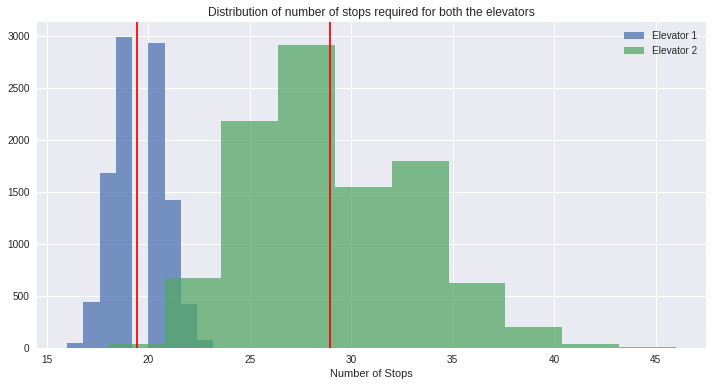

In [0]:
plt.figure(figsize=(12,6))
plt.hist(number_of_stops,label='Elevator 1',alpha = 0.75)
plt.hist(number_of_stops_2,label="Elevator 2",alpha = 0.75)
plt.axvline(np.mean(number_of_stops),color='red')
plt.axvline(np.mean(number_of_stops_2),color='red')
plt.title('Distribution of number of stops required for both the elevators')
plt.xlabel('Number of Stops')
plt.legend()
plt.show()

#Statistical Tests

Test for difference in average waiting time

In [0]:
print('The Mean Average Waiting Time for the Efficient Elevator is: ' , str(round(np.mean(waiting_times_1),2)), ' moves')
print('The Mean Average Waiting Time for the Inefficient Elevator is: ' , str(round(np.mean(waiting_times_2),2)), 'moves')

The Mean Average Waiting Time for the Efficient Elevator is:  3.34  moves
The Mean Average Waiting Time for the Inefficient Elevator is:  5.48 moves


In [0]:
from scipy.stats import ttest_ind
results = ttest_ind(waiting_times_1,waiting_times_2)
tstat = results[0]
pvalue = results[1]

print('The T-Test between the distributions is ' , str(tstat))
print('The P-Value of the T-Test is ', str(pvalue))
print('Hence, The first elevator is statistically more efficient than the second elevator')

The T-Test between the distributions is  -208.63828951361614
The P-Value of the T-Test is  0.0
Hence, The first elevator is statistically more efficient than the second elevator


Test for difference in number of stops required

In [0]:
print('The Mean number of stops required for the Efficient Elevator is: ' , str(round(np.mean(number_of_stops),2)))
print('The Mean number of stops required for the Inefficient Elevator is: ' , str(round(np.mean(number_of_stops_2),2)))

The Mean number of stops required for the Efficient Elevator is:  19.44
The Mean number of stops required for the Inefficient Elevator is:  28.94


In [0]:
results2 = ttest_ind(number_of_stops,number_of_stops_2)
tstat2 = results2[0]
pvalue2 = results2[1]

print('The T-Test between the distributions is ' , str(tstat2))
print('The P-Value of the T-Test is ', str(pvalue2))
print('Hence, The first elevator is statistically more efficient than the second elevator')

The T-Test between the distributions is  -231.15127135462802
The P-Value of the T-Test is  0.0
Hence, The first elevator is statistically more efficient than the second elevator
